In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
df1=pd.read_csv("/content/50_Startups.csv")

In [ ]:
df1.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42  California  166187.94

In [ ]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,4].values

In [ ]:
print(x,y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'California']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'New York']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'California']
 [100671.96 91790.61 249744.55 'Florida']
 [93863.75 127320.38 249839.44 'California']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'New York']
 [86419.7 153514.11 0.0 'Florida']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'California

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
Label=LabelEncoder()
x[:,3]=Label.fit_transform(x[:,3])

In [ ]:
print(x)

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 0]
 [131876.9 99814.71 362861.36 2]
 [134615.46 147198.87 127716.82 0]
 [130298.13 145530.06 323876.68 2]
 [120542.52 148718.95 311613.29 2]
 [123334.88 108679.17 304981.62 0]
 [101913.08 110594.11 229160.95 0]
 [100671.96 91790.61 249744.55 1]
 [93863.75 127320.38 249839.44 0]
 [91992.39 135495.07 252664.93 0]
 [119943.24 156547.42 256512.92 1]
 [114523.61 122616.84 261776.23 2]
 [78013.11 121597.55 264346.06 0]
 [94657.16 145077.58 282574.31 2]
 [91749.16 114175.79 294919.57 2]
 [86419.7 153514.11 0.0 1]
 [76253.86 113867.3 298664.47 0]
 [78389.47 153773.43 299737.29 2]
 [73994.56 122782.75 303319.26 0]
 [67532.53 105751.03 304768.73 0]
 [77044.01 99281.34 140574.81 2]
 [64664.71 139553.16 137962.62 0]
 [75328.87 144135.98 134050.07 2]
 [72107.6 127864.55 353183.81 2]
 [66051.52 182645.56 118148.2 1]
 [65605.48 153032.0

In [ ]:
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 0.0 1.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 0.0 1.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 0.0 73994.56 122782.75 3

In [ ]:
#Encryption problem
#Provide the code that will encrypt the message then decrypt it.

In [ ]:
print(ord('a'))
print(chr(97))

97
a


In [ ]:
message="stud"
for i in message.lower():
   ord(i)
print(ord(i))
message1=ord(i)
print(chr(message1))


100
d


In [ ]:
message="I am a student at university college of womens"
encrypted_message=" "
for i in message.lower():
  if i.isalpha():
    encrypted_message+=chr(219-ord(i))
  elif i==" ":
    encrypted_message+="**"
  else:
    encrypted_message+=i

print(encrypted_message)


 r**zn**z**hgfwvmg**zg**fmrevihrgb**xloovtv**lu**dlnvmh


In [ ]:
print(pd.DataFrame(x).head())

     0    1    2          3          4          5
0  0.0  0.0  1.0   165349.2   136897.8   471784.1
1  1.0  0.0  0.0   162597.7  151377.59  443898.53
2  0.0  1.0  0.0  153441.51  101145.55  407934.54
3  0.0  0.0  1.0  144372.41  118671.85  383199.62
4  1.0  0.0  0.0  142107.34   91391.77  366168.42


In [ ]:
from sklearn.model_selection import train_test_split
train_test_split(x,y)

[array([[1.0, 0.0, 0.0, 67532.53, 105751.03, 304768.73],
        [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
        [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
        [0.0, 1.0, 0.0, 28754.33, 118546.05, 172795.67],
        [1.0, 0.0, 0.0, 142107.34, 91391.77, 366168.42],
        [1.0, 0.0, 0.0, 22177.74, 154806.14, 28334.72],
        [0.0, 0.0, 1.0, 20229.59, 65947.93, 185265.1],
        [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
        [1.0, 0.0, 0.0, 38558.51, 82982.09, 174999.3],
        [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
        [1.0, 0.0, 0.0, 23640.93, 96189.63, 148001.11],
        [1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
        [1.0, 0.0, 0.0, 93863.75, 127320.38, 249839.44],
        [1.0, 0.0, 0.0, 27892.92, 84710.77, 164470.71],
        [1.0, 0.0, 0.0, 76253.86, 113867.3, 298664.47],
        [0.0, 0.0, 1.0, 61994.48, 115641.28, 91131.24],
        [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23],
        [1.0, 0.0, 0.0, 44069.95, 51283.14, 

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split(x,y,test_size=0.2,random_state=14)

[array([[0.0, 0.0, 1.0, 28663.76, 127056.21, 201126.82],
        [1.0, 0.0, 0.0, 22177.74, 154806.14, 28334.72],
        [0.0, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
        [0.0, 1.0, 0.0, 100671.96, 91790.61, 249744.55],
        [1.0, 0.0, 0.0, 38558.51, 82982.09, 174999.3],
        [0.0, 0.0, 1.0, 65605.48, 153032.06, 107138.38],
        [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23],
        [0.0, 0.0, 1.0, 91749.16, 114175.79, 294919.57],
        [0.0, 1.0, 0.0, 46426.07, 157693.92, 210797.67],
        [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
        [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
        [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
        [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
        [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
        [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
        [0.0, 0.0, 1.0, 72107.6, 127864.55, 353183.81],
        [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
        [1.0, 0.0, 0.0, 0.0, 116983.8, 45173.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=14)

In [ ]:
print(x.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50, 6)
(50,)
(40, 6)
(10, 6)
(40,)
(10,)


In [ ]:
print("x shape:",x.shape)
print("y shape:",y.shape)
print("x Train:",x_train.shape)
print("x Test:",x_test.shape)
print("y Train:",y_train.shape)
print("y Test:",y_test.shape)

x shape: (50, 6)
y shape: (50,)
x Train: (40, 6)
x Test: (10, 6)
y Train: (40,)
y Test: (10,)


In [ ]:
from sklearn.linear_model import LinearRegression
r=LinearRegression()
r.fit(x_train,y_train)
r

LinearRegression()

In [ ]:
y_pred=r.predict(x_test)
y_pred

array([ 46992.29340222, 118113.93670712, 152546.84491681,  99206.91723847,
        87945.53013535,  77273.68551212, 118522.64975353, 189567.93038268,
       183707.23325005, 158307.55876047])

In [ ]:
y_test

array([ 42559.73, 111313.02, 132602.65,  99937.59,  89949.14,  78239.91,
       122776.86, 191792.06, 191050.39, 156122.51])

In [ ]:
result=pd.concat([pd.DataFrame(y_pred,columns=['Prediction'])
                        ,pd.DataFrame(y_test,columns=['Test'])],axis=1)
result['Difference']=result['Prediction']-result['Test']
result

Prediction       Test    Difference
0   46992.293402   42559.73   4432.563402
1  118113.936707  111313.02   6800.916707
2  152546.844917  132602.65  19944.194917
3   99206.917238   99937.59   -730.672762
4   87945.530135   89949.14  -2003.609865
5   77273.685512   78239.91   -966.224488
6  118522.649754  122776.86  -4254.210246
7  189567.930383  191792.06  -2224.129617
8  183707.233250  191050.39  -7343.156750
9  158307.558760  156122.51   2185.048760

In [ ]:
r2_score(y_test,y_pred)

0.973474954355189

In [ ]:
y_final_pred=r.predict(x)
y_final_pred

array([192577.5936131 , 189567.93038268, 183707.23325005, 173334.25307143,
       171093.01766635, 162795.31959542, 158307.55876047, 160356.36676279,
       152197.73705584, 154319.25773265, 135041.77592031, 137046.83963992,
       129148.83111479, 127715.54946377, 152546.84491681, 146028.49357839,
       116878.25108624, 130669.5842267 , 128743.35102725, 118522.64975353,
       116446.53136456, 118113.93670712, 114752.71224431, 109651.22374275,
       112669.56876675, 102616.16692774, 111033.53776076, 114631.09644782,
       105481.00894923, 102479.60216101,  99206.91723847,  98372.14228427,
        99052.0934655 ,  97490.44026376,  92415.21124119,  89678.59702284,
        75592.29185814,  87945.53013535,  68505.31333552,  82859.2808048 ,
        77273.68551212,  74023.52399789,  70137.50109257,  60414.2085062 ,
        65504.7985268 ,  47865.59922452,  58802.27016968,  46992.29340222,
        47574.76343749,  48292.39484897])

In [ ]:
#final prediction
y_fpred=pd.DataFrame(y_final_pred,columns=['Prediction'])
result=pd.concat([df1,y_fpred],axis=1)
result['Difference']=result['Profit']-result['Prediction']
result

R&D Spend  Administration  Marketing Spend       State     Profit  \
0   165349.20       136897.80        471784.10    New York  192261.83   
1   162597.70       151377.59        443898.53  California  191792.06   
2   153441.51       101145.55        407934.54     Florida  191050.39   
3   144372.41       118671.85        383199.62    New York  182901.99   
4   142107.34        91391.77        366168.42  California  166187.94   
5   131876.90        99814.71        362861.36    New York  156991.12   
6   134615.46       147198.87        127716.82  California  156122.51   
7   130298.13       145530.06        323876.68    New York  155752.60   
8   120542.52       148718.95        311613.29    New York  152211.77   
9   123334.88       108679.17        304981.62  California  149759.96   
10  101913.08       110594.11        229160.95  California  146121.95   
11  100671.96        91790.61        249744.55     Florida  144259.40   
12   93863.75       127320.38        249839.44  California  141585.52   
13   91992.39       135495.07        252664.93  California  134307.35   
14  119943.24       156547.42        256512.92     Florida  132602.65   
15  114523.61       122616.84        261776.23    New York  129917.04   
16   78013.11       121597.55        264346.06  California  126992.93   
17   94657.16       145077.58        282574.31    New York  125370.37   
18   91749.16       114175.79        294919.57    New York  124266.90   
19   86419.70       153514.11             0.00     Florida  122776.86   
20   76253.86       113867.30        298664.47  California  118474.03   
21   78389.47       153773.43        299737.29    New York  111313.02   
22   73994.56       122782.75        303319.26  California  110352.25   
23   67532.53       105751.03        304768.73  California  108733.99   
24   77044.01        99281.34        140574.81    New York  108552.04   
25   64664.71       139553.16        137962.62  California  107404.34   
26   75328.87       144135.98        134050.07    New York  105733.54   
27   72107.60       127864.55        353183.81    New York  105008.31   
28   66051.52       182645.56        118148.20     Florida  103282.38   
29   65605.48       153032.06        107138.38    New York  101004.64   
30   61994.48       115641.28         91131.24    New York   99937.59   
31   61136.38       152701.92         88218.23    New York   97483.56   
32   63408.86       129219.61         46085.25  California   97427.84   
33   55493.95       103057.49        214634.81    New York   96778.92   
34   46426.07       157693.92        210797.67     Florida   96712.80   
35   46014.02        85047.44        205517.64    New York   96479.51   
36   28663.76       127056.21        201126.82    New York   90708.19   
37   44069.95        51283.14        197029.42  California   89949.14   
38   20229.59        65947.93        185265.10    New York   81229.06   
39   38558.51        82982.09        174999.30  California   81005.76   
40   28754.33       118546.05        172795.67     Florida   78239.91   
41   27892.92        84710.77        164470.71  California   77798.83   
42   23640.93        96189.63        148001.11  California   71498.49   
43   15505.73       127382.30         35534.17    New York   69758.98   
44   22177.74       154806.14         28334.72  California   65200.33   
45    1000.23       124153.04          1903.93    New York   64926.08   
46    1315.46       115816.21        297114.46     Florida   49490.75   
47       0.00       135426.92             0.00  California   42559.73   
48     542.05        51743.15             0.00    New York   35673.41   
49       0.00       116983.80         45173.06  California   14681.40   

       Prediction    Difference  
0   192577.593613   -315.763613  
1   189567.930383   2224.129617  
2   183707.233250   7343.156750  
3   173334.253071   9567.736929  
4   171093.017666  -4905.077666  
5   162795.319595  -5804.199595  
6   158307.558760  -2185.048760  
7   1603

In [ ]:
r2_score(df1['Profit'],y_final_pred)

0.9506036891520118

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/Position Salary .csv")
df.head()

Position  Level  Salary
0   Busienss Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4  120000
4    Country Manager      5  140000

In [ ]:
x=df.iloc[:,1:2].values
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
y=df.iloc[:,2].values
print(y)

[ 45000  50000  60000 120000 140000 130000 100000  90000  95000  85000]


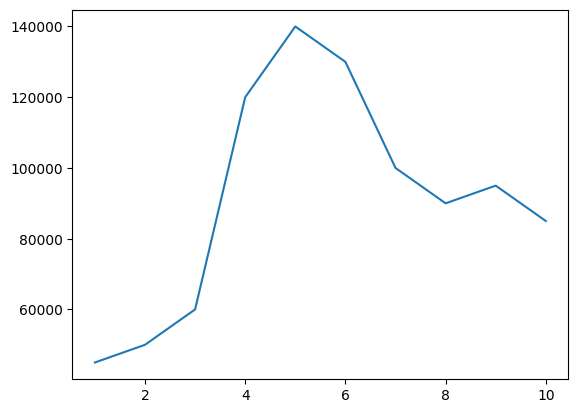

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
print(x.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 1)
(10,)
(8, 1)
(2, 1)
(8,)
(2,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x,y)
print(dt)

DecisionTreeRegressor()


In [ ]:
from sklearn.linear_model import LinearRegression
r1=LinearRegression()
r1.fit(x_train,y_train)
r1

LinearRegression()

In [ ]:
y_pred=dt.predict(x)
print(y_pred)

[ 45000.  50000.  60000. 120000. 140000. 130000. 100000.  90000.  95000.
  85000.]


In [ ]:
r2_score(y,y_pred)

1.0

In [ ]:
result=pd.concat([df,pd.DataFrame(y_pred,columns=['Prediction'])],axis=1)
result

Position  Level  Salary  Prediction
0   Busienss Analyst      1   45000     45000.0
1  Junior Consultant      2   50000     50000.0
2  Senior Consultant      3   60000     60000.0
3            Manager      4  120000    120000.0
4    Country Manager      5  140000    140000.0
5     Region Manager      6  130000    130000.0
6            Partnor      7  100000    100000.0
7     Senior Partnor      8   90000     90000.0
8            C Level      9   95000     95000.0
9               CEO      10   85000     85000.0

In [ ]:
import numpy as np
x_grid=np.arange(min(x),max(x),0.1)

In [ ]:
x_grid

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [ ]:
x_grid=x_grid.reshape((len(x_grid),1))

In [ ]:
dt.predict(x_grid)

array([ 45000.,  45000.,  45000.,  45000.,  45000.,  45000.,  50000.,
        50000.,  50000.,  50000.,  50000.,  50000.,  50000.,  50000.,
        50000.,  50000.,  60000.,  60000.,  60000.,  60000.,  60000.,
        60000.,  60000.,  60000.,  60000.,  60000., 120000., 120000.,
       120000., 120000., 120000., 120000., 120000., 120000., 120000.,
       120000., 140000., 140000., 140000., 140000., 140000., 140000.,
       140000., 140000., 140000., 140000., 130000., 130000., 130000.,
       130000., 130000., 130000., 130000., 130000., 130000., 130000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000.,  90000.,  90000.,  90000.,  90000.,
        90000.,  90000.,  90000.,  90000.,  90000.,  90000.,  95000.,
        95000.,  95000.,  95000.,  95000.,  95000.,  95000.,  95000.,
        95000.,  95000.,  85000.,  85000.,  85000.,  85000.])

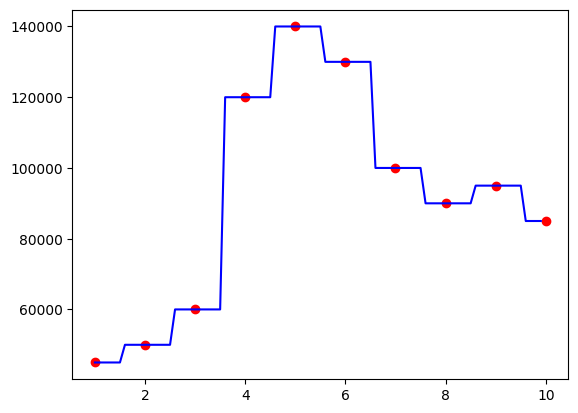

In [ ]:
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,dt.predict(x_grid),color='blue')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
split_dt=DecisionTreeRegressor(min_samples_split=8)
split_dt.fit(x,y)
print(split_dt)

DecisionTreeRegressor(min_samples_split=8)


In [ ]:
split_pred=split_dt.predict(x)
print(split_pred)

[ 51666.66666667  51666.66666667  51666.66666667 108571.42857143
 108571.42857143 108571.42857143 108571.42857143 108571.42857143
 108571.42857143 108571.42857143]


In [ ]:
r2_score(y,split_pred)

0.7044930378263712

In [ ]:
arr1=np.array([3,3.5,3])
print(arr1)

[3.  3.5 3. ]


In [ ]:
arr1.reshape(1,3)

array([[3. , 3.5, 3. ]])

In [ ]:
arr1=arr1.reshape(3,1)
arr1

array([[3. ],
       [3.5],
       [3. ]])

In [ ]:
y_pred1=dt.predict(arr1)
print(y_pred1)

[60000. 60000. 60000.]


In [ ]:
y_pred2=split_dt.predict(arr1)
print(y_pred2 )

[51666.66666667 51666.66666667 51666.66666667]


In [ ]:
df=pd.read_csv("/content/diabetes_dataset.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
x=df.drop(['Outcome'],axis=1)
x

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [ ]:
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [ ]:
model=DecisionTreeClassifier()
model=model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 77.92207792207793


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[87, 20],
       [14, 33]])

In [ ]:
print("Accuracy:",((84+33)/151))

Accuracy: 0.7748344370860927


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       107
           1       0.62      0.70      0.66        47

    accuracy                           0.78       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.79      0.78      0.78       154



In [ ]:
pip install pydotplus

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six']=six
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus


In [ ]:
features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
pip install python-graphviz

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


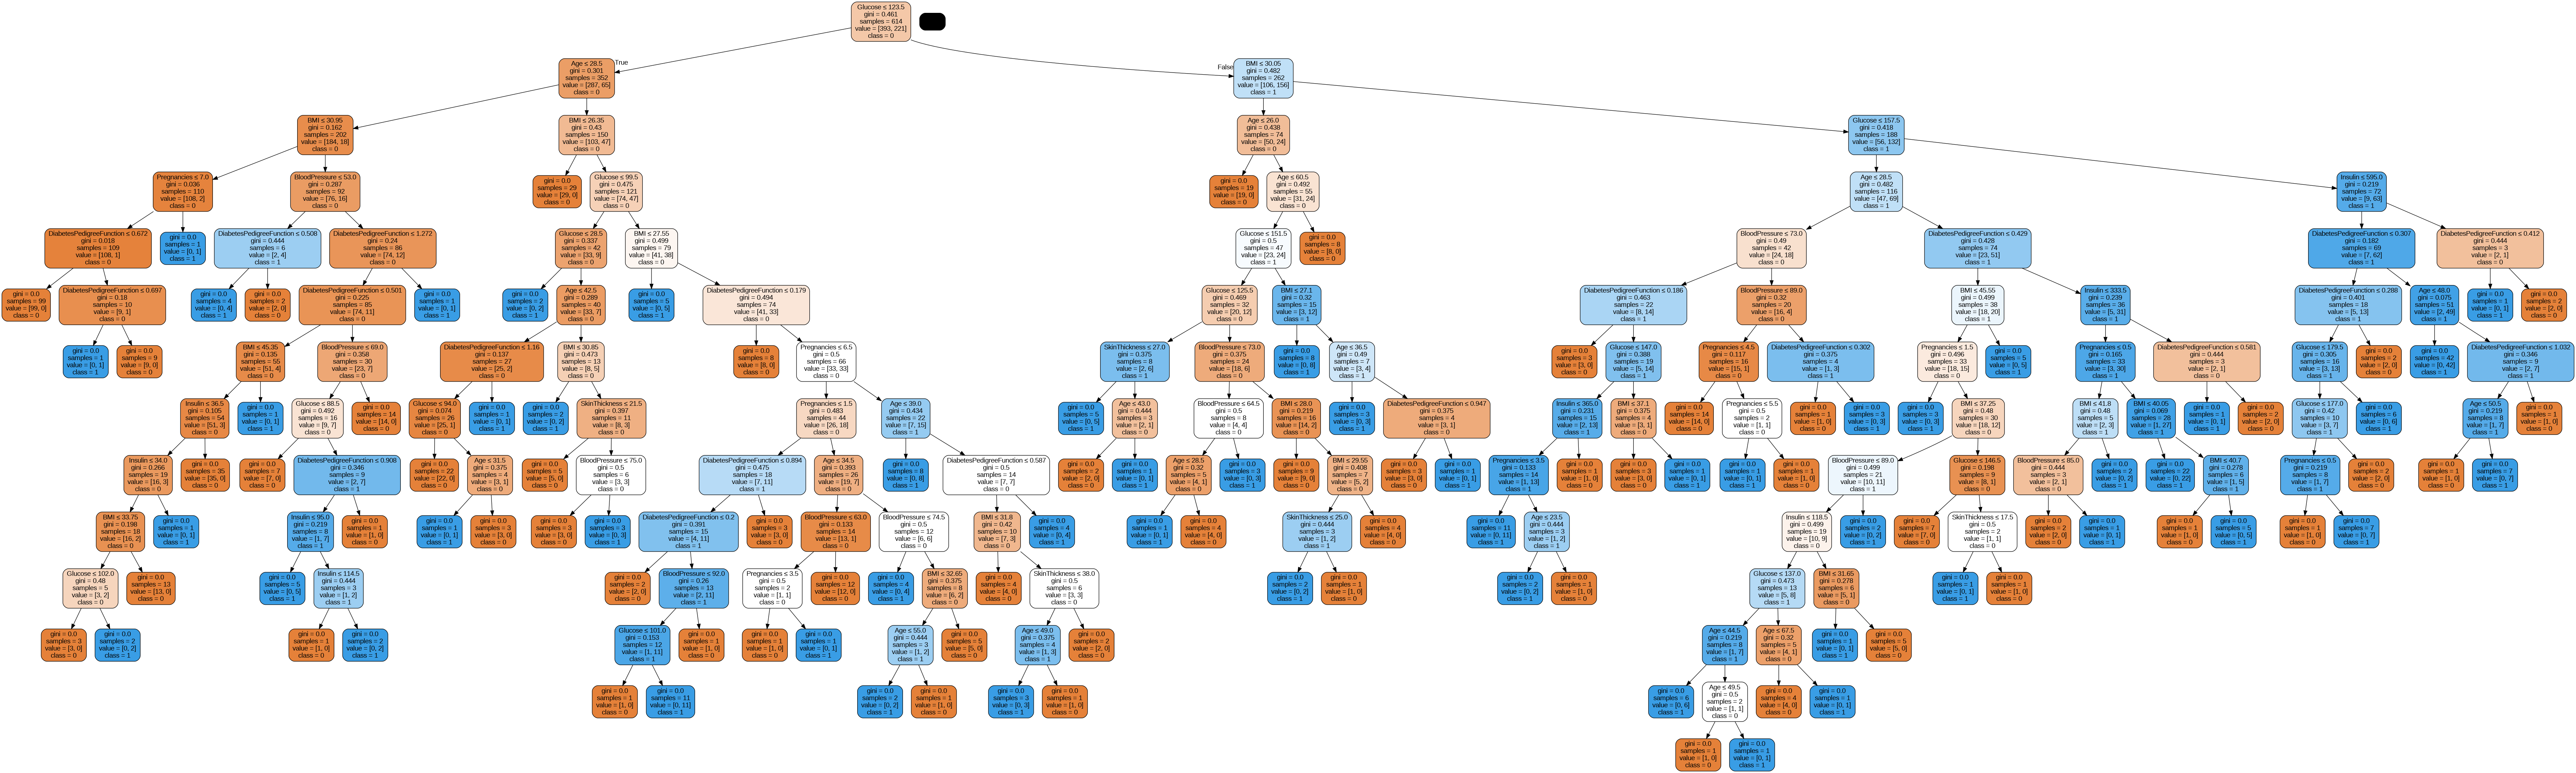

In [ ]:
#Better Decision Tree Visualisation
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [75]:
df=pd.read_csv("/content/Position Salary .csv")
print(df)

            Position  Level  Salary
0   Busienss Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4  120000
4    Country Manager      5  140000
5     Region Manager      6  130000
6            Partnor      7  100000
7     Senior Partnor      8   90000
8            C Level      9   95000
9               CEO      10   85000


In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [82]:
df=pd.read_csv("/content/Position Salary .csv")
print(df)

            Position  Level  Salary
0   Busienss Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4  120000
4    Country Manager      5  140000
5     Region Manager      6  130000
6            Partnor      7  100000
7     Senior Partnor      8   90000
8            C Level      9   95000
9               CEO      10   85000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [90]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [91]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf

RandomForestRegressor()

In [108]:
pip install opencv-python

In [110]:
from google.colab.patches import cv2_imshow

In [153]:
import cv2
import numpy as np

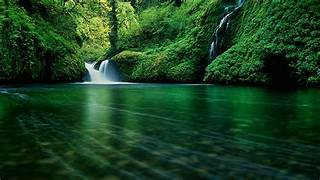

-1

In [154]:
img=cv2.imread("/content/PICTURE.jpg",cv2.IMREAD_COLOR)
cv2_imshow(img)
cv2.waitKey(0)

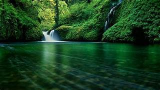

-1

In [155]:
half=cv2.resize(img,(0,0),fx=0.5,fy=0.5)
cv2_imshow(half)
cv2.waitKey(0)

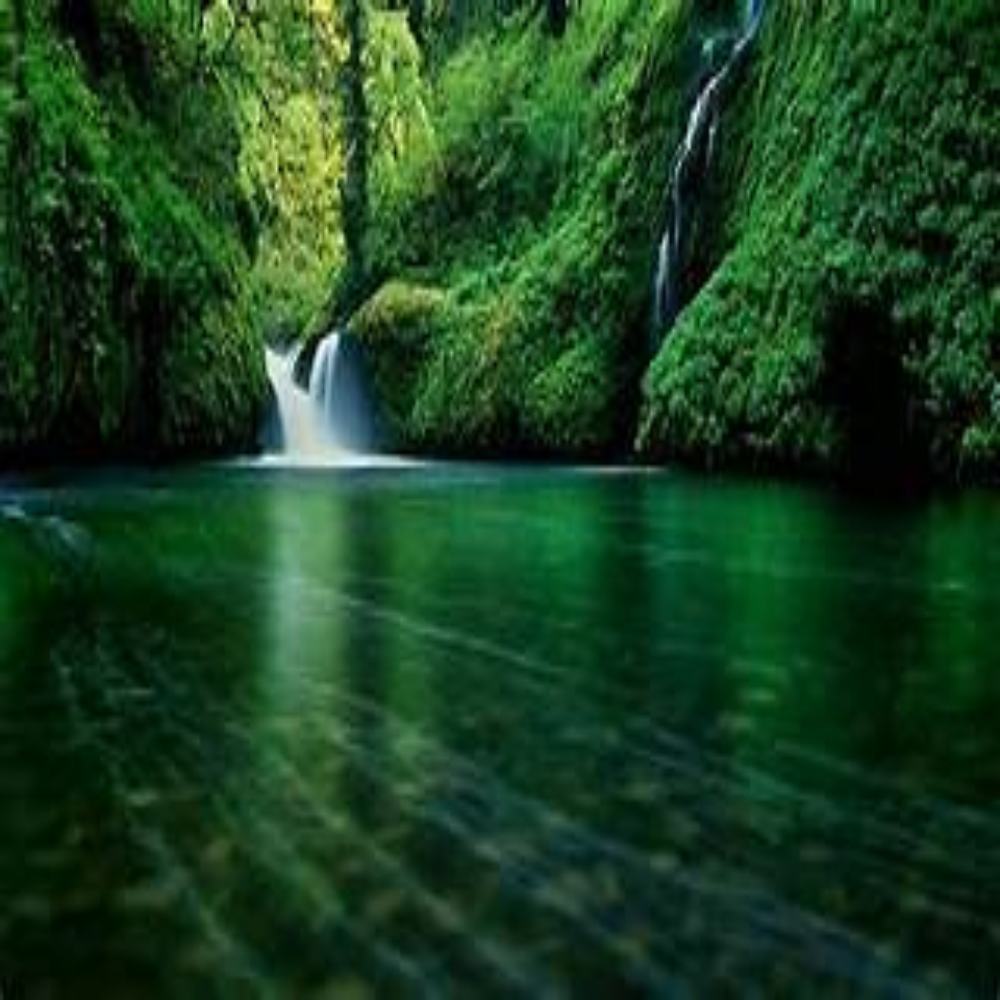

-1

In [156]:
bigger=cv2.resize(img,(1000,1000))
cv2_imshow(bigger)
cv2.waitKey(0)

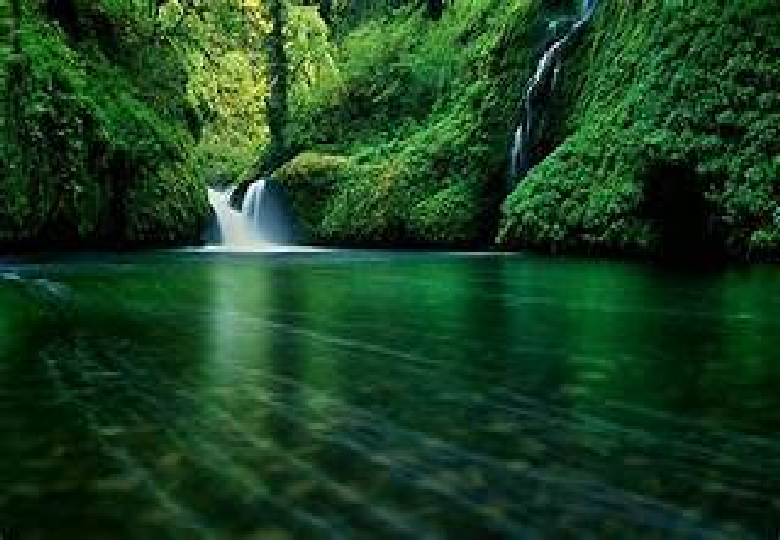

-1

In [157]:
stretch_near=cv2.resize(img,(780,540),interpolation=cv2.INTER_NEAREST)
cv2_imshow(stretch_near)
cv2.waitKey(0)

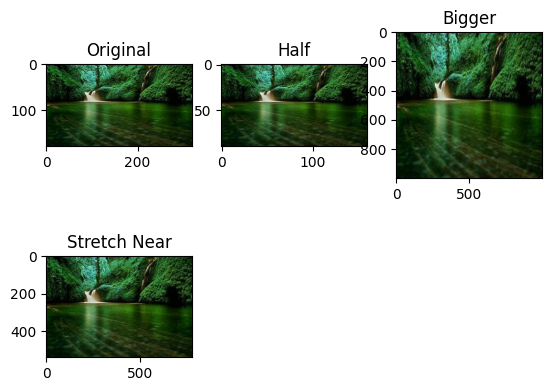

In [158]:
import matplotlib.pyplot as plt
Titles=["Original","Half","Bigger","Stretch Near"]
images=[img,half,bigger,stretch_near]
for i in range(4):
  plt.subplot(2,3,i+1)
  plt.title(Titles[i])
  plt.imshow(images[i])

In [161]:
from google.colab.patches import cv2_imshow

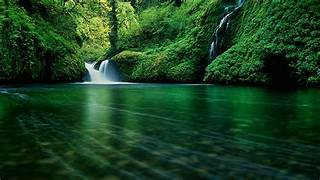

-1

In [162]:
import cv2
import numpy as np
image=cv2.imread("/content/PICTURE.jpg")
cv2_imshow(image)
cv2.waitKey(0)

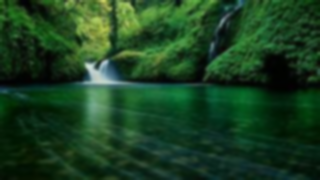

-1

In [163]:
Gaussian=cv2.GaussianBlur(image,(7,7),0)
cv2_imshow( Gaussian)
cv2.waitKey(0)

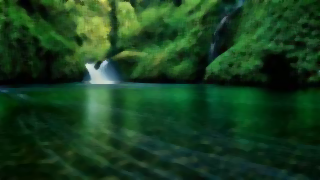

-1

In [164]:
median=cv2.medianBlur(image,5)
cv2_imshow(median)
cv2.waitKey(0)

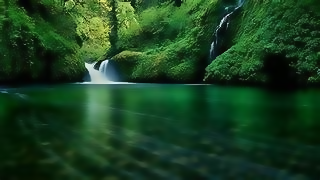

In [165]:
bilateral=cv2.bilateralFilter(image,9,75,5)
cv2_imshow(bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()

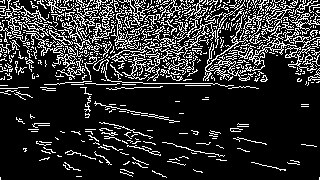

-1

In [166]:
img=cv2.imread("/content/PICTURE.jpg")
edge=cv2.Canny(img,100,150)
cv2_imshow(edge)
cv2.waitKey(0)

180 320


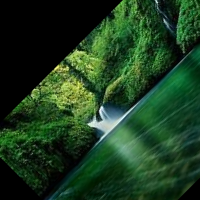

-1

In [169]:
(rows,cols)=img.shape[:2]
print(rows,cols)
M=cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
res=cv2.warpAffine(img,M,(200,200))
cv2_imshow(res)
cv2.waitKey(0)

In [173]:
import cv2
alg='haarcascade_frontalface_default.xml'
cascade=cv2.CascadeClassifier(alg)
cam=cv2.VideoCapture(0)
while True:
  _, img=cam.read()
  grayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  face=cascade.detectMultiScale(grayImg)
  for (x,y,w,h) in face:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  cv2.imshow("FaceDetect",img)
  key=cv2.waitKey(1)
  if Key==81 or Key==113:
    break
cv2.destroyAllWindows()
cam.relese()

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import cv2

In [174]:
cam_port=0
cam-cv2.VideoCapture(cam_port)
result,image=cam.read()
if result:
  cv2.imshow("pst",image)
  cv2.waitkey(0)
  cv2.destroywindow("pst")
else:
  print("No Image")

TypeError: unsupported operand type(s) for -: 'cv2.VideoCapture' and 'cv2.VideoCapture'